# Day 07 - graph solving

We are asked to order the nodes of a dependency graph here, so we need to implement a [topological sort](https://en.wikipedia.org/wiki/Topological_sorting), but with a small twist: the nodes must be visited in sorted order. This makes it a *priority* ordering, really.

We start with putting the nodes and edges into a dictionary; `{node: {dep, dep, ...}}`, where keys are dependencies for the nodes in the value set. We can then use Kahn's algorithm to visit all the nodes in order.

1. We track incoming edges by reversing the graph dictionary: `{dep: {node, node, ...}}`.
2. Every time we process a node, we remove it from the outgoing edges (`edges[dep].remove(node)`). If there are no more edges for the node then we can queue it up.

Note that we have to visit the nodes in *sorted* order; we can use a [`heapq`](https://docs.python.org/3/library/heapq.html) to maintain the queue of nodes to visit, this will efficiently keep nodes we add in an order that'll give us the next available node.

In [1]:
import re
from heapq import heapify, heappop, heappush

_parse_line = re.compile(
    r"Step (?P<dep>[A-Z]+) must be finished before step (?P<node>[A-Z]+) can begin."
)


def parse_graph(t):
    graph = {}
    for dep, node in _parse_line.findall(t):
        graph.setdefault(dep, set()).add(node)
    return graph

def topological_sort(graph):
    edges = {}
    for node, deps in graph.items():
        for d in deps:
            edges.setdefault(d, set()).add(node)
    # determine what nodes have no incoming edges
    # this is a set operation: any key in graph that's not a key in edges
    start = graph.keys() - edges
    # set up our queue, ensuring we process the next best node (alphabetical order)
    queue = list(start)
    heapify(queue)
    while queue:
        node = heappop(queue)
        yield node
        for dep in graph.get(node, ()):
            edges[dep].remove(node)
            # only when there are more outgoing edges left
            if not edges[dep]:
                heappush(queue, dep)

In [2]:
testgraph = parse_graph('''
Step C must be finished before step A can begin.
Step C must be finished before step F can begin.
Step A must be finished before step B can begin.
Step A must be finished before step D can begin.
Step B must be finished before step E can begin.
Step D must be finished before step E can begin.
Step F must be finished before step E can begin.''')
assert ''.join(topological_sort(testgraph)) == 'CABDFE'

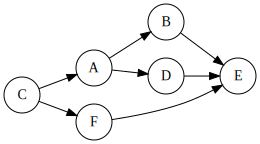

In [3]:
import graphviz

def plot_graph(g, **graph_attr):
    dot = graphviz.Digraph(
        'sled_instructions',
        graph_attr=graph_attr,
        node_attr={'shape': 'circle'},
        strict=True)
    for dep, nodes in sorted(g.items()):
        dot.edges((dep, n) for n in nodes)
    return dot

plot_graph(testgraph, rankdir='LR')

In [4]:
import aocd

data = aocd.get_data(day=7, year=2018)
graph = parse_graph(data)

In [5]:
print('Part 1:', ''.join(topological_sort(graph)))

Part 1: GDHOSUXACIMRTPWNYJLEQFVZBK


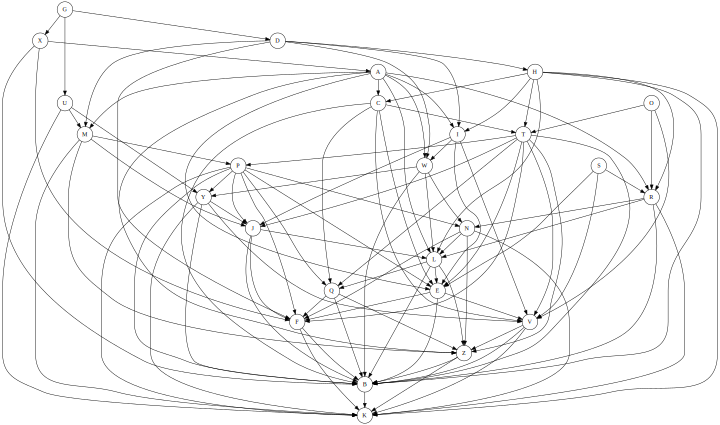

In [6]:
plot_graph(graph, mincross='2.0', size='10,10')